In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

x_train = train_dataset.data.float() / 255  #κανονικοποιούμε τις τιμές των pixel
y_train = train_dataset.targets

x_test = test_dataset.data.float() / 255
y_test = test_dataset.targets


W_1 = np.random.rand(784,128) - 0.5
b_1 = np.random.rand(128, 1) - 0.5 
W_2 = np.random.rand(128, 10) - 0.5
b_2 = np.random.rand(10, 1) - 0.5 #ορίζουμε τυχαία τους πίνακς των biases και weights με τις απαιτούμενες διαστάσεις
A_layers = []
for i in range(len(x_train)):
   A_layers.append(x_train[i].reshape(784, 1))

def ReLU(x):
  return np.maximum(0, x)

def softmax(Z):
  Z = Z - np.max(Z)  
  exp_values = np.exp(Z)
  sum_exp_values = np.sum(exp_values)     #απλά εφαρμόζουμε τον τύπο της softmax και κάνουμε τις τιμές των 10 νευρώνων μία κατανομή διακριτής τυχαίας μεταβλητής
  A_out_prob = exp_values / sum_exp_values
  return A_out_prob


def forwardProp(A , W_1 , b_1, W_2, b_2): #με A να είναι ένας 784x1 πινακας η ίσοδος layer 0 στο νευρωνικό δύκτιο , W να έιναι ένας
                                          #784x10 πίνακας με τα βάρη των ακμών και b να είναι ένας 10x1 πίνακας τα biases όλων των νέων κορυφών
  A_1 = np.dot(W_1.T , A)
  Z_1 = A_1 + b_1
  A_1 = ReLU(Z_1)
  A_2 = np.dot(W_2.T, A_1)
  Z_2 = A_2 + b_2
  A_2 = softmax(Z_2)
  return A_1, Z_1, A_2 , Z_2

def d_ReLU(x):
  return x > 0


def backProp(A, A_1, A_2, Z_1, Z_2, W_1, W_2, mean):
    vector = np.zeros((10, 1))
    vector[mean, 0] = 1

    
    dZ2 = 2 * (A_2 - vector) #10x1
    dW2 = np.dot(A_1, dZ2.T)
    db2 = dZ2

    dA1 = np.dot(W_2, dZ2) #(10x10) x (10x1)
    dZ1 = dA1 * d_ReLU(Z_1) #10x1
    dW1 = np.dot(A, dZ1.T) #(784x1) x (1x10)  
    db1 = dZ1
    

    return dW1, db1, dW2, db2

    


def gradientDescent(W_1, b_1, W_2, b_2, learning_rate, epochs):
    accuracy_list = []
    
    for epoch in range(epochs):
      correct_predictions = 0
      total_samples = len(x_train)
      for i in range(total_samples):
          A = A_layers[i]
          A_1, Z_1, A_2 , Z_2 = forwardProp(A, W_1, b_1, W_2, b_2)

          predicted_label = np.argmax(A_2)
          if predicted_label == y_train[i]:
              correct_predictions += 1

          dW_1, db_1, dW_2, db_2 = backProp(A, A_1, A_2, Z_1, Z_2, W_1, W_2 ,y_train[i])

          W_1 = W_1 - learning_rate * dW_1
          b_1 = b_1 - learning_rate * db_1
          W_2 = W_2 - learning_rate * dW_2
          b_2 = b_2 - learning_rate * db_2
        
      accuracy = (correct_predictions / total_samples) * 100
      accuracy_list.append(accuracy)
      print(f"Epoch {epoch+1}, Accuracy: {accuracy:.2f}%")

      if (epoch + 1) % 5 == 0:
        learning_rate *= 0.5
        print(f"Learning rate decayed to {learning_rate}")

    return accuracy_list[-1], W_1, b_1, W_2, b_2

In [4]:
accuracy, c_W_1, c_b_1, c_W_2, c_b_2 = gradientDescent(W_1, b_1, W_2, b_2, 0.01, 8)

/var/folders/6f/0r5f_r2d4b19rx1kcvn6hym80000gn/T/ipykernel_55657/1415621992.py:39: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  A_1 = np.dot(W_1.T , A)
/var/folders/6f/0r5f_r2d4b19rx1kcvn6hym80000gn/T/ipykernel_55657/1415621992.py:62: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dW1 = np.dot(A, dZ1.T) #(784x1) x (1x10)


Epoch 1, Accuracy: 92.41%
Epoch 2, Accuracy: 96.35%
Epoch 3, Accuracy: 97.24%
Epoch 4, Accuracy: 97.89%
Epoch 5, Accuracy: 98.30%
Learning rate decayed to 0.005
Epoch 6, Accuracy: 98.99%
Epoch 7, Accuracy: 99.39%
Epoch 8, Accuracy: 99.64%


/var/folders/6f/0r5f_r2d4b19rx1kcvn6hym80000gn/T/ipykernel_55657/1415621992.py:39: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  A_1 = np.dot(W_1.T , A)


Training accuracy: 97.35%
265
Label: tensor(8)
Prediction: 2


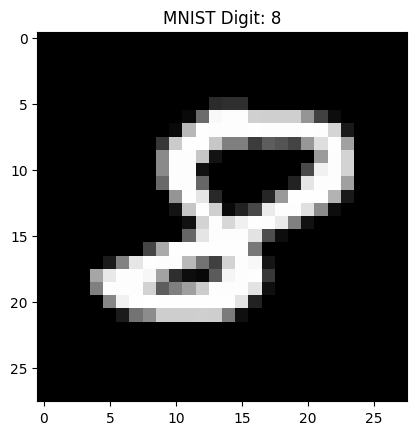

Label: tensor(4)
Prediction: 9


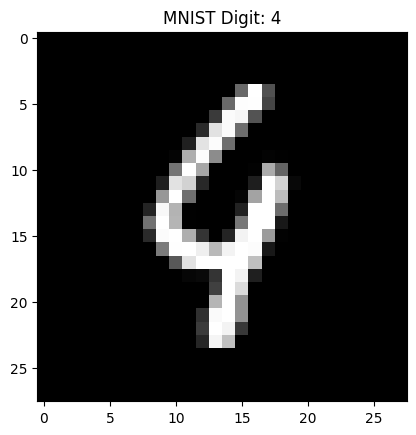

Label: tensor(7)
Prediction: 4


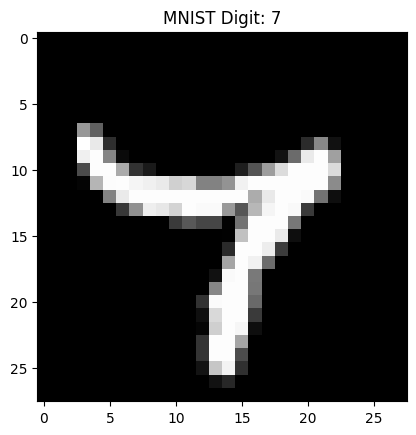

Label: tensor(2)
Prediction: 9


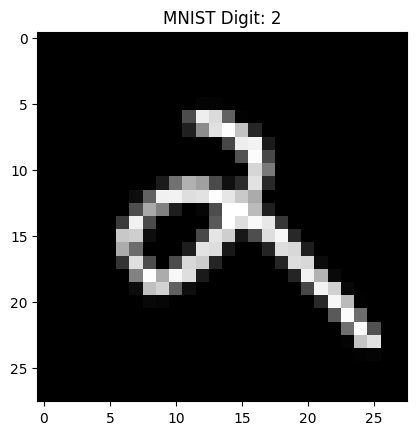

Label: tensor(9)
Prediction: 5


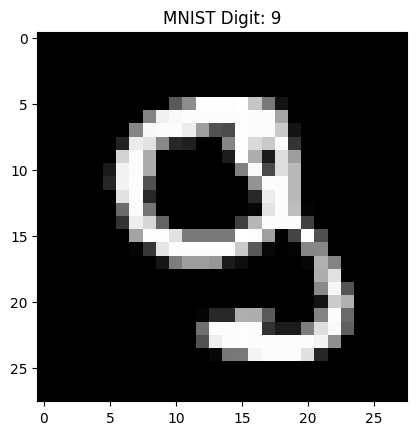

Label: tensor(6)
Prediction: 5


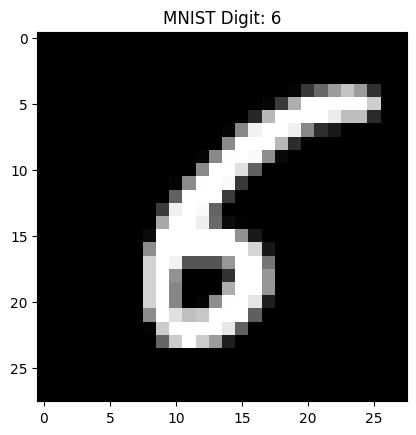

Label: tensor(9)
Prediction: 8


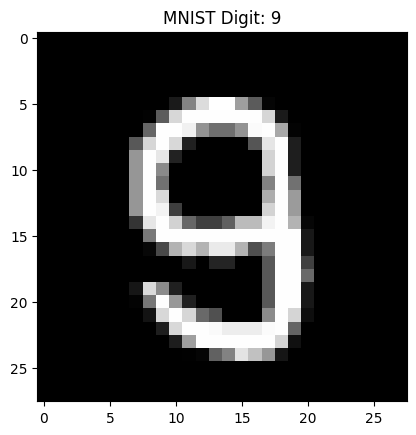

Label: tensor(4)
Prediction: 2


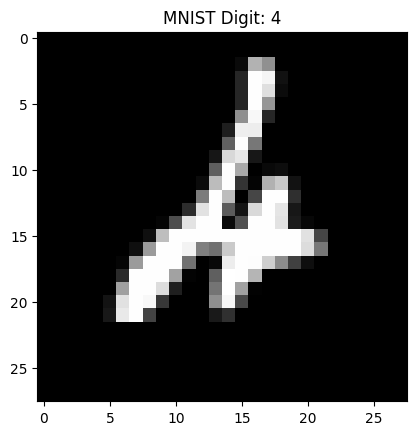

Label: tensor(8)
Prediction: 0


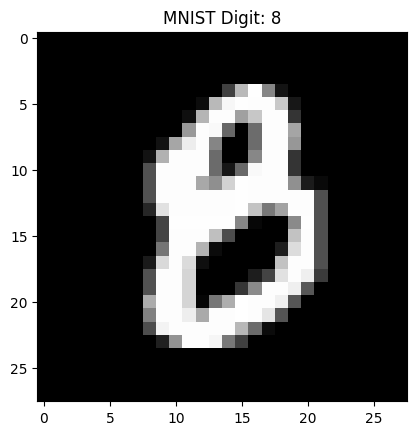

Label: tensor(2)
Prediction: 7


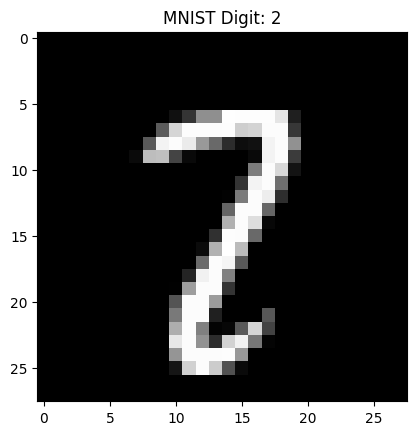

In [7]:

def evaluate_test_accuracy(W_1, b_1, W_2, b_2, x_data, y_data):
    correct_predictions = 0
    total_samples = len(x_data)
    wrong_index = []

    for n in range(total_samples):
        input_data = x_data[n].reshape(784, 1)
        
        A_1, Z_1, A_2, Z_2 = forwardProp(input_data, W_1, b_1, W_2, b_2)
        
        predicted_label = np.argmax(A_2)
    
        if predicted_label == y_data[n]:
            correct_predictions += 1
        else:
            wrong_index.append(n)
    
    accuracy_1 = (correct_predictions / total_samples) * 100
    
    return accuracy_1, wrong_index


test_accuracy, wrong = evaluate_test_accuracy(c_W_1, c_b_1, c_W_2, c_b_2, x_test, y_test)

print(f"Training accuracy: {test_accuracy:.2f}%")
print(len(wrong))



indexes = [61, 115, 124, 149, 151, 217, 241, 247, 266, 321]
for i in indexes:
    input_data = x_test[i].reshape(784, 1)
    A_1, Z_1, A_2 , Z_2 = forwardProp(input_data, c_W_1, c_b_1 , c_W_2, c_b_2)
    predicted_label = np.argmax(A_2)
    print("Label:" , y_test[i])
    print("Prediction:", predicted_label)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"MNIST Digit: {y_test[i]}") 
    plt.show()

